In [2]:
%reset
import os
from math import *
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from helpers import *
from classifiers.pca import *
from classifiers.knn import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
root = 'orl_faces'
X, y = load_faces(root)

In [4]:
X_train = X[0:400:2,:]
X_test = X[1:400:2,:]
y_train = y[0:400:2]
y_test = y[1:400:2]

In [5]:
# pca
alpha = [0.8, 0.85, 0.9, 0.95]
U = []
pca = []
for x in range(0,len(alpha)):
    o = PCA()
    pca.append(o)
    U.append(pca[x].train(X_train, alpha=alpha[x], load_path='./pca_projection.npz', verbose=False))
    U[x] = np.real(U[x])

34
(10304,) (10304, 34)
50
(10304,) (10304, 50)
74
(10304,) (10304, 74)
114
(10304,) (10304, 114)


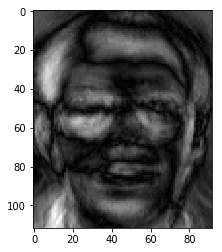

In [6]:
plt.imshow(U[0][:,6].reshape((112,92)),cmap='gray')

In [7]:
X_train_pca = []
for y in range(0,len(U)):
    X_train_pca.append(pca[y].project(X_train))
X_test_pca = []
for y in range(0,len(U)):
    X_test_pca.append(pca[y].project(X_test))  

In [8]:
for x in range(0,len(alpha)):
    knn_1 = K_nearest_neighbour()
    knn_1.train(X_train_pca[x], y_train)
    test_predictions = knn_1.predict(X_test_pca[x])
    train_predictions = knn_1.predict(X_train_pca[x])
    train_accuracy = np.mean(train_predictions == y_train)
    test_accuracy = np.mean(test_predictions == y_test)
    print(f'training accuracy {x} = {train_accuracy}')
    print(f'testing accuracy {x} = {test_accuracy}')

training accuracy 0 = 1.0
testing accuracy 0 = 0.74
training accuracy 1 = 1.0
testing accuracy 1 = 0.705
training accuracy 2 = 1.0
testing accuracy 2 = 0.675
training accuracy 3 = 1.0
testing accuracy 3 = 0.625


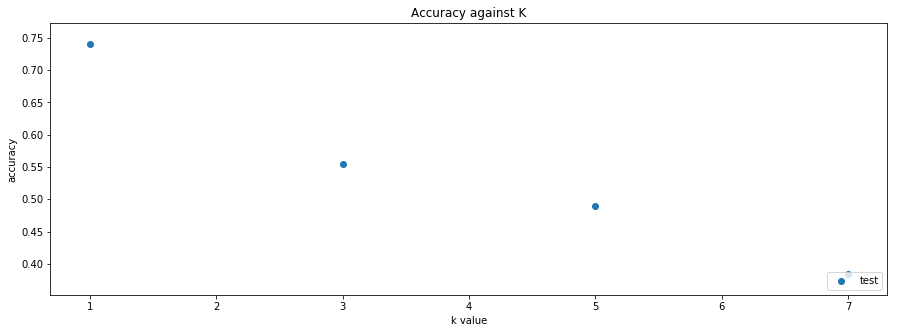

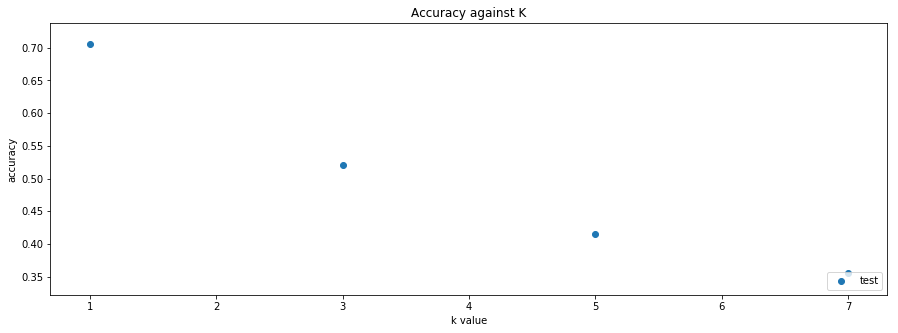

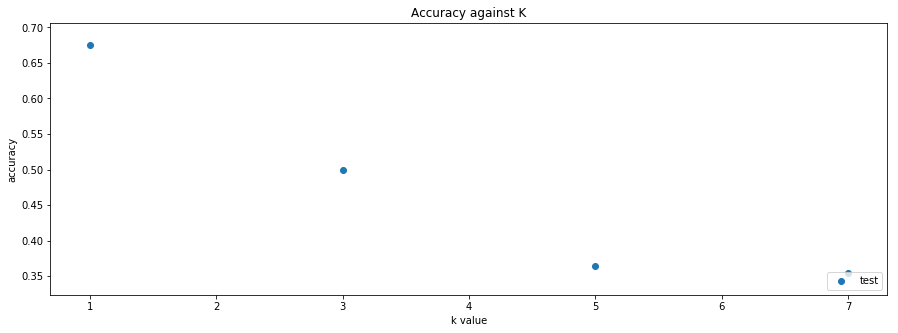

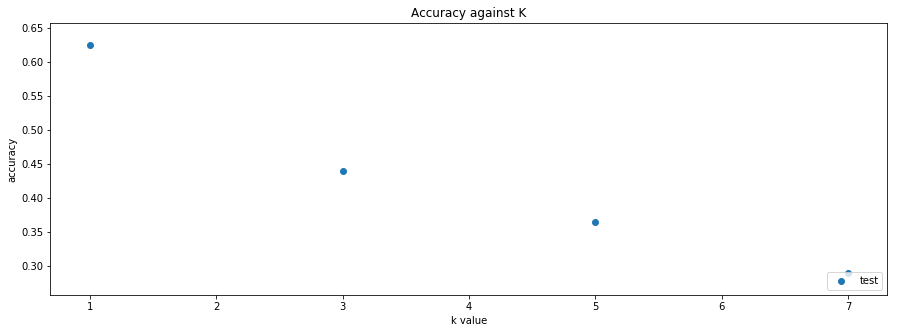

In [22]:
def knn_class(alpha):
    Ks = [1, 3, 5, 7]
    train_accs, test_accs = [],[]

    for k in Ks:
        knn = K_nearest_neighbour(k=k)
        knn.train(X_train_pca[alpha], y_train)
        test_predictions = knn.predict(X_test_pca[alpha])
        train_predictions = knn.predict(X_train_pca[alpha])
        train_accs.append(np.mean(train_predictions == y_train))
        test_accs.append(np.mean(test_predictions == y_test))

    plt.scatter(Ks,test_accs, label='test')
    plt.legend(loc='lower right')
    plt.title('Accuracy against K')
    plt.xlabel('k value')
    plt.ylabel('accuracy')
    plt.gcf().set_size_inches(15,5)
    plt.show()

for x in range(0,len(alpha)):
    knn_class(x)

In [30]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
